In [1]:


from datar.all import (
    f,
    tibble,
    c,
    NA,
    head,
    mutate,
    log10,
    pivot_longer,
    is_na,
    filter,
    rep,
    seq,
    paste0
)
from plotnine import *
from plotnine_prism import *

%run nb_helpers.py

df = (
    tibble(
        agonist=c(
            1e-10, 1e-8, 3e-8, 1e-7, 3e-7, 1e-6, 3e-6, 1e-5, 3e-5, 1e-4, 3e-4
        ),
        ctr1=c(0, 11, 125, 190, 258, 322, 354, 348, NA, 412, NA),
        ctr2=c(3, 33, 141, 218, 289, 353, 359, 298, NA, 378, NA),
        ctr3=c(2, 25, 160, 196, 345, 328, 369, 372, NA, 399, NA),
        trt1=c(3, NA, 11, 52, 80, 171, 289, 272, 359, 352, 389),
        trt2=c(5, NA, 25, 55, 77, 195, 230, 333, 306, 320, 338),
        trt3=c(4, NA, 28, 61, 44, 246, 243, 310, 297, 365, NA),
    )
    >> mutate(log_agonist=log10(f.agonist))
    >> pivot_longer(
        [~f.agonist, ~f.log_agonist],
        names_pattern=r"(.{3})([0-9])",
        names_to=["treatment", "rep"],
        values_to="response",
    )
    >> filter(~is_na(f.response))
)

df >> head()


[2022-05-12 21:17:51][datar][WARNING] Package `pdtypes` not installed for `options(enable_pdtypes=True)`
[2022-05-12 21:17:51][datar][WARNING] Builtin name "filter" has been masked by datar.


,agonist,log_agonist,treatment,rep,response
0,1.000000e-10,-10.000000,ctr,1,0.0
1,1.000000e-08,-8.000000,ctr,1,11.0
2,3.000000e-08,-7.522879,ctr,1,125.0
3,1.000000e-07,-7.000000,ctr,1,190.0
4,3.000000e-07,-6.522879,ctr,1,258.0
5,1.000000e-06,-6.000000,ctr,1,322.0


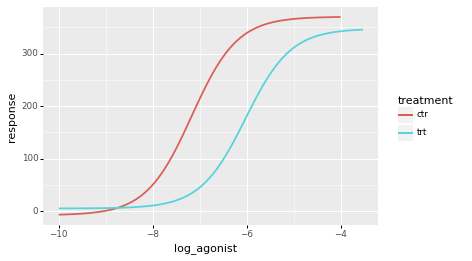

<ggplot: (8758840385335)>

In [2]:
p = (
    ggplot(df, aes(x="log_agonist", y="response")) +
    geom_smooth(
        aes(colour="treatment"),
        se=False,
        method=nls,
        method_args=dict(minv=1.67, maxv=397, ec50=-7, hill_coeff=1)
    )
)
p

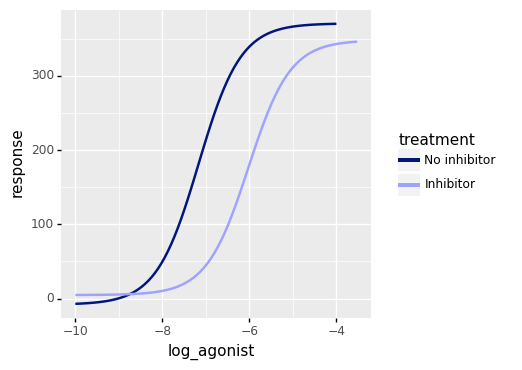

<ggplot: (8758918988063)>

In [3]:
# apply a manual colour scale to the curves
p = p + scale_colour_manual(
  labels = c("No inhibitor", "Inhibitor"),
  values = c("#00167B", "#9FA3FE")
)
p

/home/pwwang/.cache/pypoetry/virtualenvs/plotnine-prism-NG4cAqVm-py3.9/lib/python3.9/site-packages/plotnine/scales/scales.py:29: PlotnineWarning: Scale for 'color' is already present.
Adding another scale for 'color',
which will replace the existing scale.



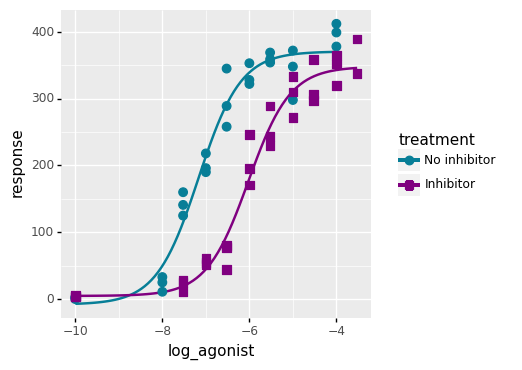

<ggplot: (8758836025890)>

In [4]:
# reset the colour scale, add the data points, then use a new colour scale
p = (
    p
    + geom_point(aes(colour="treatment", shape="treatment"), size=3)
    + scale_colour_prism(
        palette="winter_bright", labels=c("No inhibitor", "Inhibitor")
    )
    + scale_shape_prism(labels=c("No inhibitor", "Inhibitor"))
)
p


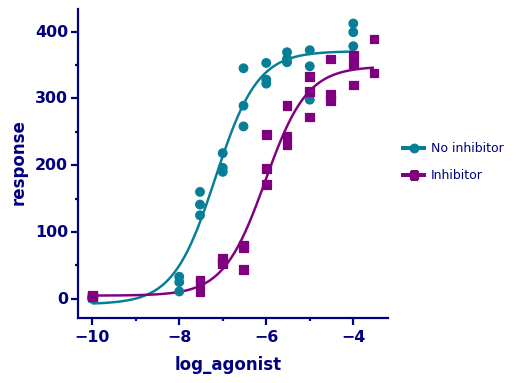

<ggplot: (8758836018113)>

In [5]:
# use the Winter Bright theme and make the size of all plot elements larger
p = p + theme_prism(palette = "winter_bright", base_size = 12)
p

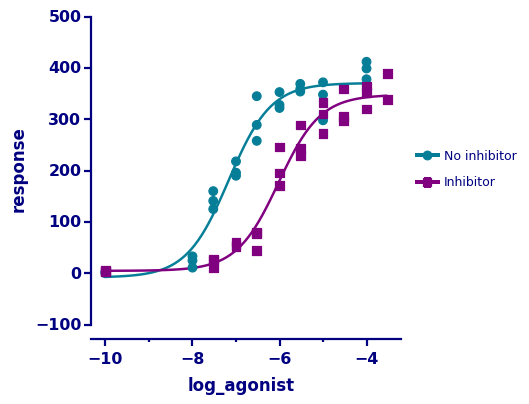

<ggplot: (8758835988511)>

In [6]:
# adjust the axis limits, major tick positions, and axis guide
p = p + scale_y_continuous(
  limits = c(-100, 500), 
  breaks = seq(-100, 500, 100),
  guide = guide_prism_offset()
)
p


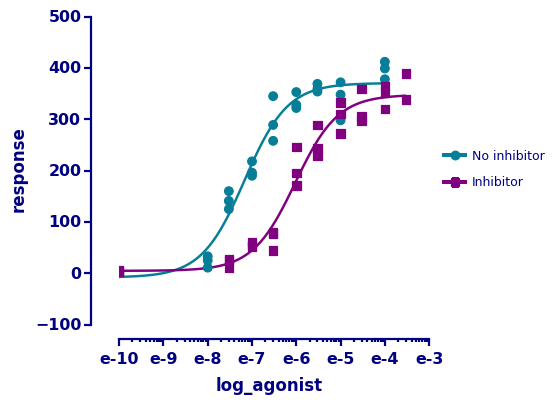

<ggplot: (8758835935085)>

In [7]:
# adjust the axis limits, major and minor tick positions, axis guide, and
# axis text (aka. label) appearance
p = p + scale_x_continuous(
    limits=c(-10, -3),
    breaks=seq(-10, -3),
    guide=guide_prism_offset_minor(),
    minor_breaks=log10(rep(seq(1, 9), 7) * (10. ** rep(seq(-10, -4), each=9))),
    labels=paste0("e", seq(-10, -3))
)
p


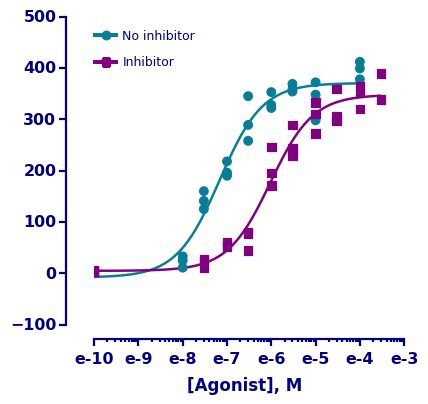

<ggplot: (8758835958917)>

In [8]:
# remove the y axis title and legend title, change the x axis title and
# move the legend to the top left
p = p + theme(
  axis_title_y = element_blank(),
  legend_title = element_blank(),
  legend_position = (0.25, 0.8),
#   legend_justification = c(0.05, 0.95)
) + labs(x = "[Agonist], M")
p